Support Vector Machine on Iris Flower Dataset

In [42]:
from sklearn import datasets
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
iris = datasets.load_iris() #Loading the dataset
iris.keys()
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )


In [43]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


We can see that the Iris dataset consists of the length and width of sepals and petals of the three species of Iris including the target column.

Since there is no column of names of species in the data frame let's add one more column with names of different species corresponding to their numerical values. It really helps us to access the different classes using their names instead of numbers.

In [44]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


Plotting the dataset

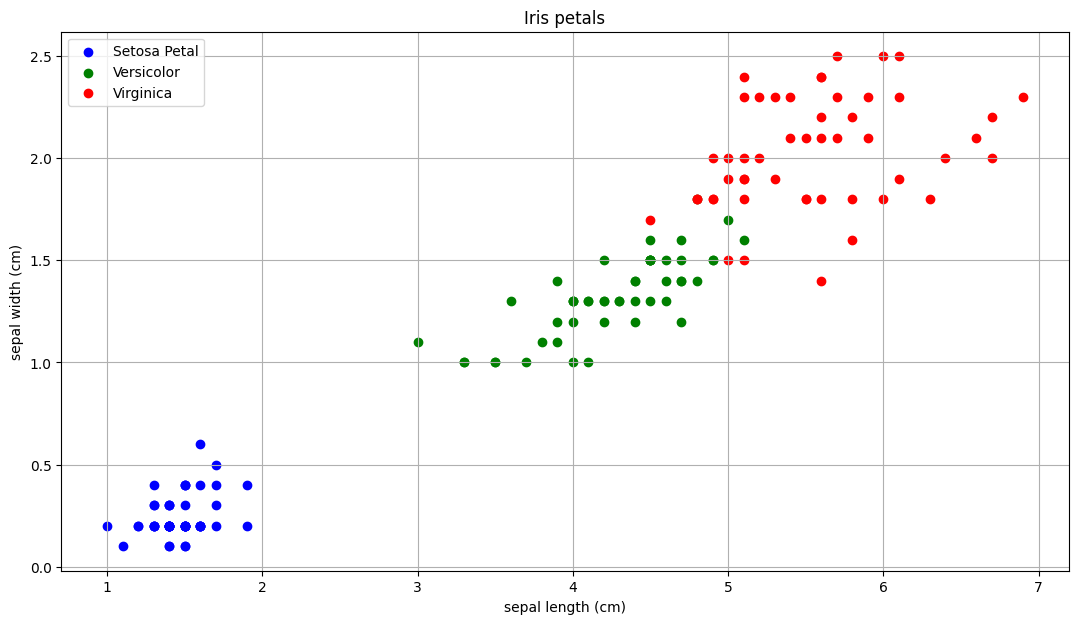

In [45]:
import matplotlib.pyplot as plt

setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa Petal", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")

ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

Here we are plotting the distribution of the petal length and width of the Iris flowers and not the sepal. We only need two features either sepal or petal.

Performing Classification using SVC

We only need two features of the dataset which are the petal length and width for classifying the species of Iris since the petal length and petal width are different among the three species of Iris and it helps to classify them.

In [46]:
from sklearn.model_selection import train_test_split

X = iris.drop(['sepal length (cm)', 'sepal width (cm)', 'target', 'species'], axis=1)
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=42)

Here the X and y values containing the features and labels respectively are split into train and test sets using the sci-kit learn train_test_split method.

Training and testing the SVC classifier

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Input the kernel from the user

kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("Accuracy using {}:".format(kernel), accuracy_score(pred, y_test))

Accuracy using linear: 0.9518072289156626
Accuracy using rbf: 0.9879518072289156
Accuracy using poly: 1.0


We can see the accuracy of the SVC classifier using different kernels. The polynomial kernel scored a high accuracy of 100% followed by RBF with 98% and linear with 95%. However this doesn't mean that one kernel is better than the other, it depends on how the data is being distributed.

Plotting the decision boundary of SVC

For better understanding, let's plot how SVC classified the three species of Iris into their corresponding classes.

The plot_contours function:- 

It is typically used to plot decision boundaries of a classifier on a mesh grid. It takes the following parameters:

ax: The matplotlib axis object where the contours will be plotted.
clf: The classifier object that has a predict method.
xx and yy: The mesh grid created using make_meshgrid.
cmap: The colormap to be used for the contour plot.
alpha: The transparency of the contour plot.

plot_contours:-

This function predicts the class labels for each point in the mesh grid using the classifier clf, reshapes the predictions to match the mesh grid shape, and then plots the decision boundaries using ax.contourf.


Accuracy using linear: 0.9518072289156626


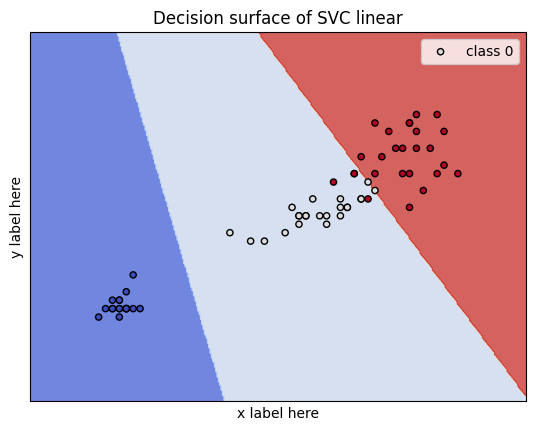

Accuracy using rbf: 0.9879518072289156


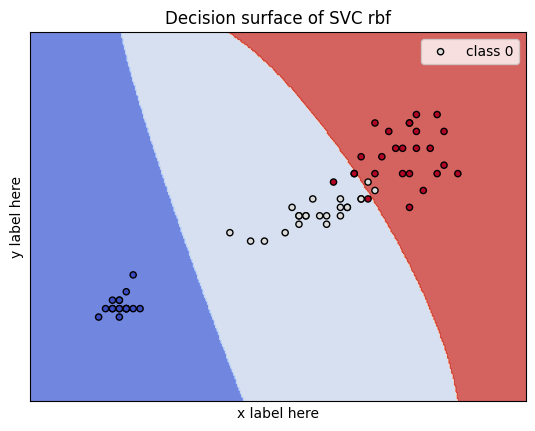

Accuracy using poly: 1.0


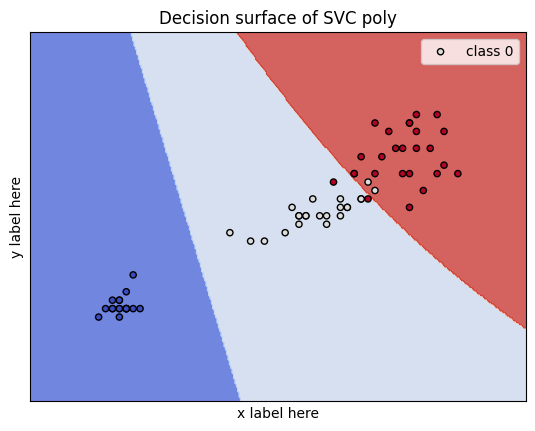

In [48]:
import warnings
from sklearn.svm import SVC

warnings.filterwarnings("ignore")
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Your code continues here
kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)

    pred = model.predict(X_test)

    print("Accuracy using {}:".format(kernel), accuracy_score(pred, y_test))
    
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of SVC ' + kernel)
    # Set-up grid for plotting.
    X0, X1 = X_train.iloc[:, 0], X_train.iloc[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('y label here')
    ax.set_xlabel('x label here')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend([f'class {i}' for i in range(len(np.unique(y_train)))])
    plt.show()
